In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [3]:
import pandas as pd
import zipfile
from io import BytesIO
import requests

# URL of the ZIP file
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00228/smsspamcollection.zip'

# Download and extract the ZIP file
response = requests.get(url)
with zipfile.ZipFile(BytesIO(response.content)) as z:
    # Assuming the file inside the ZIP is named 'SMSSpamCollection'
    with z.open('SMSSpamCollection') as f:
        # Read the dataset into a DataFrame
        sms_data = pd.read_csv(f, sep='\t', names=['label', 'message'])

# View the first few rows of the dataset
print(sms_data.head())


  label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


In [4]:
# Convert labels to numerical format
sms_data['label'] = sms_data['label'].map({'ham': 0, 'spam': 1})

# Split the data into training and testing sets
X = sms_data['message']
y = sms_data['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [5]:
# Create a pipeline
pipeline = Pipeline([
    ('vect', CountVectorizer()),  # Convert text to word count vectors
    ('tfidf', TfidfTransformer()),  # Apply TF-IDF transformation
    ('clf', MultinomialNB()),  # Naive Bayes classifier
])

# Fit the model
pipeline.fit(X_train, y_train)


Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', MultinomialNB())])

Accuracy: 0.97
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       966
           1       1.00      0.75      0.86       149

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.96      1115



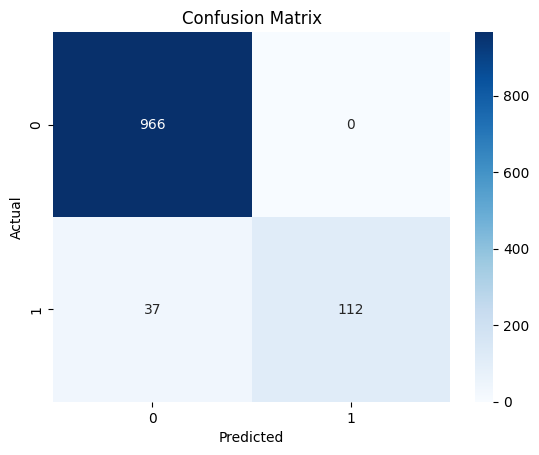

In [6]:
# Predictions
y_pred = pipeline.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Classification report
print(classification_report(y_test, y_pred))

# Confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
